In [1]:
import math
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
rng=np.random.default_rng()

I'm going to have my stats class use confidence intervals for proportions to approximate $\pi$. To facilitate this, I created a method that will produce a Monte Carlo approximation of $\pi$ using n randomly generated points in the unit square. For my own purposes, I'm having it return the error in approximating $\pi$ and a dataframe containing the $x$ and $y$ values of those points, as well as a column that checks if that point is in the unit circle.

Let's take a look at how this approximation works. First, we randomly generate $n$ points with $x$ and $y$ values between 0 and 1. Of those points, $\pi/4$ of them should lie within the unit circle. To see this, first note that the points $(x,y)$ all lie in the unit square in the first quadrant and that the unit square has an area of 1. The portion of the unit circle in the first quadrant is inscribed in the unit square has an area of $\pi/4$ (since it's a quarter of the unit circle, which has an area of $\pi$). So the proportion of the unit square taken up by by the unit circle is $\pi/4$, which is the long run proportion of $n$ randomly generated points lying within the unit circle.

For each of the randomly generated points, we compute the sum of squares of the $x$ and $y$ coordinates, i.e. the square of the $\ell_2$ norm. Note that for such $x$ and $y$, the square distance is less than 1 if and only if the distance is less than 1 (the map $x\to x^2$ is a bijective mapping of the unit interval to itself). In other words, a point $(x,y)$ lies inside the unit circle if and only if the sum of squares of coordinate is less than 1. This allows us to not have to compute square roots when checking if a point is in the unit circle (which speeds up the computation a bit). Then the proportion of them that lie inside the unit circle, $\hat p$ is an approximation of $\pi/4$.

From there, the method also computes the error in our approximation of $\pi/4$ with a specified level of confidence (the default is 0.95 or 95%) using the binomial approxmation of the normal (a special case of the central limit theorem).

In [3]:
def monte_carlo_pi(n, CL=0.95):
    # Randomly generate points in the unit square in the first quadrant
    points=rng.random((n,2))
    # Square and sum the x and y coordinates.
    sq_points=points**2
    sq_dist=sq_points.sum(axis=1)
    
    # Ceate a boolean array that checks if each point is in the unit circle or not.
    circ=sq_dist <= 1
    # p_hat approximates pi/4
    p_hat=circ.sum()/n
    q_hat=1-p_hat
    pi_approx=p_hat*4
    
    # The true proportion of points in the circle is pi/4
    p=math.pi/4
    q=1-p
    
    # Computing our error in approximating pi/4
    alpha_2=(1-CL)/2
    z=norm.ppf(CL+alpha_2)
    SE=math.sqrt(p*q/n)
    E=SE*z
    
    
    points_df=pd.DataFrame({'x' : points[:,0], 'y' : points[:,1], 'In Circle' : circ })
    
    # Return the approximation of pi, and the error in approximating pi (not pi/4) as well as the dataframe
    return(pi_approx, E, points_df)

In [36]:
pi_hat, E, df = monte_carlo_pi(2000)

print(f'({pi_hat-E*4}, {pi_hat+E*4})')


(3.0540294631209575, 3.1979705368790423)


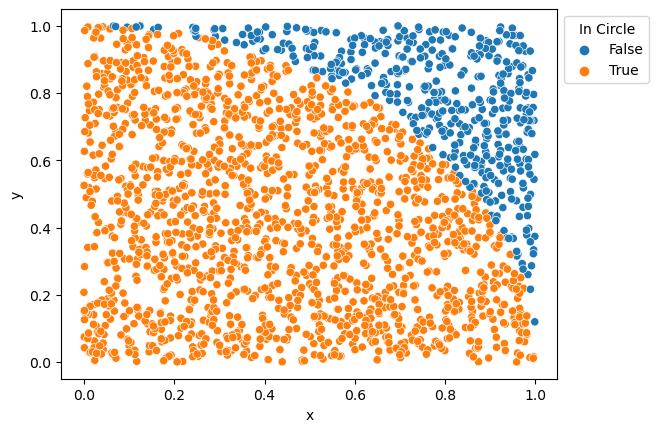

In [37]:
# Visualizing the Monte Carlo method
ax=sns.scatterplot(data=df, x='x', y='y', hue='In Circle')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))